In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf

df = pd.read_csv(os.path.join(os.sys.path[0], "Star39552_balanced.csv"))

In [15]:
df = df[['Vmag','Plx','e_Plx','B-V','TargetClass']]

In [16]:
x = np.array(df[['Vmag','Plx','e_Plx','B-V']].values)
y = np.array(df[['TargetClass']].values)
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [24]:
model = Sequential()
model.add(Dense(12, input_dim=4, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy','mean_absolute_error'])
history = model.fit(x_train,y_train, epochs=10, batch_size=150)
loss,accuracy,mae = model.evaluate(x_test, y_test)
print("Model accuracy: %.2f"% (accuracy*100))

Epoch 1/10
3165/3165 [==============================] - 2s 605us/step - loss: 0.4012 - accuracy: 0.8286 - mean_absolute_error: 0.2627
Epoch 2/10
3165/3165 [==============================] - 2s 601us/step - loss: 0.3249 - accuracy: 0.8778 - mean_absolute_error: 0.1954
Epoch 3/10
3165/3165 [==============================] - 2s 599us/step - loss: 0.3210 - accuracy: 0.8791 - mean_absolute_error: 0.1917
Epoch 4/10
3165/3165 [==============================] - 2s 607us/step - loss: 0.3194 - accuracy: 0.8794 - mean_absolute_error: 0.1900
Epoch 5/10
3165/3165 [==============================] - 2s 583us/step - loss: 0.3182 - accuracy: 0.8787 - mean_absolute_error: 0.1896
Epoch 6/10
3165/3165 [==============================] - 2s 616us/step - loss: 0.3180 - accuracy: 0.8785 - mean_absolute_error: 0.1881
Epoch 7/10
3165/3165 [==============================] - 2s 616us/step - loss: 0.3169 - accuracy: 0.8795 - mean_absolute_error: 0.1880
Epoch 8/10
3165/3165 [==============================] - 2s 602

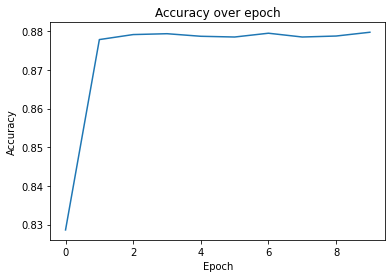

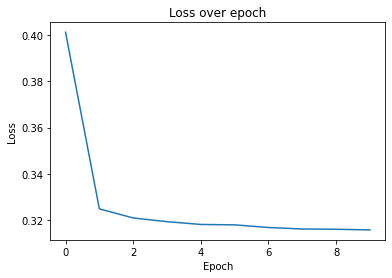

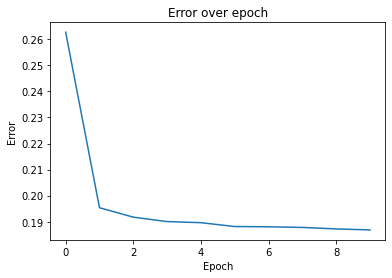

In [27]:
# Plotting Accuracy over the epoch
plt.plot(history.history['accuracy'])
plt.title('Accuracy over epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
# Plotting Loss over the Epoch
plt.plot(history.history['loss'])
plt.title('Loss over epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
# Plotting Error over the Epoch
plt.plot(history.history['mean_absolute_error'])
plt.title('Error over epoch')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

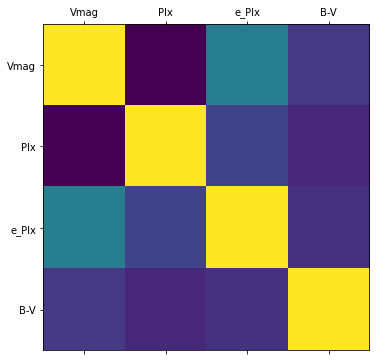

In [28]:
corr = df[['Vmag','Plx','e_Plx','B-V']].corr()
fig,ax = plt.subplots(figsize = (6,6))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)),corr.columns)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()